<a href="https://colab.research.google.com/github/pridenous/NumPyLeasson/blob/master/fourthLeasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
import pandas as pd

In [11]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01') :
  url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
      symbol=symbol, exchange=exchange)
  resp = requests.get(url, params={
      'periods' : '3600',
      'after' : str(int(pd.Timestamp(after).timestamp()))
  })
  resp.raise_for_status()
  data = resp.json()
  df = pd.DataFrame(data['result']['3600'], columns=[
       'CloseTime', 'OpenPrice', 'HighPrice', 'LowerPrice', 'ClosePrice', 'Volume', 'NA'                                             
  ])
  df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
  df.set_index('CloseTime', inplace=True)
  return df

In [12]:
last_week = (pd.Timestamp.now() - pd.offsets .Day(7))
last_week

Timestamp('2020-11-17 01:55:39.530467')

In [13]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [14]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [15]:
btc.head()

,OpenPrice,HighPrice,LowerPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-11-17 02:00:00,16812.20,16813.54,16691.32,16698.05,126.649123,2.119083e+06
2020-11-17 03:00:00,16698.92,16750.00,16645.94,16683.88,222.586520,3.711739e+06
2020-11-17 04:00:00,16688.19,16717.57,16585.00,16594.34,301.384475,5.010891e+06
2020-11-17 05:00:00,16588.23,16687.40,16570.00,16687.09,168.187027,2.795748e+06
2020-11-17 06:00:00,16683.31,16687.51,16610.98,16630.13,115.326111,1.919946e+06


In [19]:
btc.describe()

,OpenPrice,HighPrice,LowerPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,18119.532544,18216.465503,18001.293550,18129.903195,400.557523,7.227940e+06
std,554.026858,545.839750,555.804048,545.638877,281.485398,5.024963e+06
min,16588.230000,16687.400000,16570.000000,16594.340000,56.401209,1.046732e+06
25%,17797.070000,17917.510000,17682.690000,17800.280000,222.586520,4.071491e+06
50%,18227.270000,18344.480000,18104.870000,18234.850000,324.030851,5.913115e+06
75%,18586.950000,18656.990000,18482.110000,18584.280000,479.981783,8.812595e+06
max,18878.000000,18977.000000,18785.350000,18878.000000,1882.256967,3.355962e+07


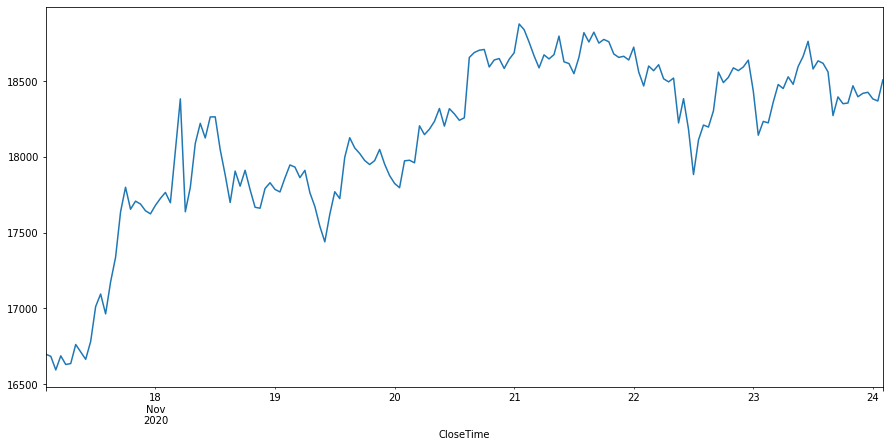

In [16]:
btc['ClosePrice'].plot(figsize=(15,7))

In [17]:
 eth.head()

,OpenPrice,HighPrice,LowerPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-11-17 02:00:00,468.39,469.42,465.09,465.09,1326.713951,619981.747859
2020-11-17 03:00:00,465.19,466.87,463.55,464.09,884.288933,411501.892296
2020-11-17 04:00:00,464.07,465.01,461.73,462.28,1202.564523,557316.094417
2020-11-17 05:00:00,462.38,466.39,461.82,466.00,825.030378,383679.989985
2020-11-17 06:00:00,465.73,466.48,463.40,463.58,661.432021,307726.718559


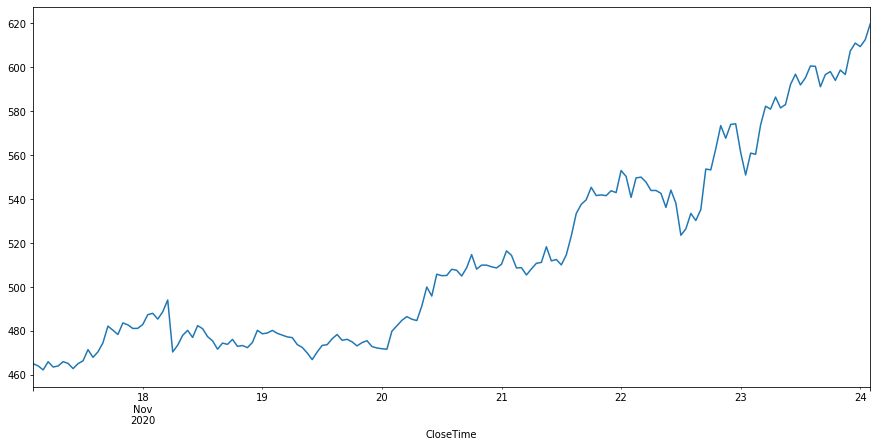

In [18]:
eth['ClosePrice'].plot(figsize=(15,7))

# **Use Bokeh Graph for Intuitive data**

In [20]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [22]:
output_notebook()

In [25]:
pl = figure(x_axis_type ="datetime", title="Crypto Prices", width=800)
pl.grid.grid_line_alpha = 0.3
pl.xaxis.axis_label = 'Date'
pl.yaxis.axis_label = 'Price'

pl.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')

pl.legend.location = "top_left"

show(pl)

# **Exporting Excel**

In [26]:
writer = pd.ExcelWriter('Cryptos.xlsx')

In [27]:
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')

In [28]:
writer.save